In [99]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
my_app_secret = ""

## Getting Account Info from the Riot API to match their summoner name

``` API Link: /lol/summoner/v3/summoners/by-name/{summonerName} ```

In [3]:
request = 'https://na1.api.riotgames.com/lol/summoner/v3/summoners/by-name/RiotSchmick?api_key='+my_app_secret

res = requests.get(request)

In [4]:
type(res.json())

dict

In [5]:
summoner_names = pd.read_csv('./lcs_player_2018.csv')['Player'].values

In [6]:
info = []
for name in summoner_names: 
    request = 'https://na1.api.riotgames.com/lol/summoner/v3/summoners/by-name/' + name + '?api_key='+my_app_secret
    info.append(requests.get(request).json())

In [7]:
info = pd.DataFrame.from_dict(info)

## Getting match history of the players recently

```API Link: /lol/match/v3/matchlists/by-account/{accountId}```

In [8]:
account_ids = info['accountId'].values

In [9]:
account_ids[0]

30130

In [10]:
request = 'https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/' + str(30130) +\
'/?api_key='+my_app_secret + '&season=11'

In [11]:
matches = []
for account in account_ids:
    request = 'https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/' + str(account) +\
'/?api_key='+my_app_secret + '&season=11' 
    matches.append(requests.get(request).json())

In [12]:
pd.DataFrame.from_dict(matches[0]['matches'])

,champion,gameId,lane,platformId,queue,role,season,timestamp
0,26,2703762918,MID,NA1,420,DUO,11,1516976790328
1,101,2702935541,BOTTOM,NA1,420,DUO_SUPPORT,11,1516891801033
2,101,2701159390,BOTTOM,NA1,420,DUO_SUPPORT,11,1516718571072
3,101,2699779360,BOTTOM,NA1,420,DUO_SUPPORT,11,1516573873526
4,101,2696284908,BOTTOM,NA1,420,DUO_SUPPORT,11,1516224049198


matches[0]['matches'] --> account_ids[0]'s matches

In [13]:
df = pd.DataFrame(columns={'champion', 'gameID', 'lane', 'platformId', 'queue', 'role', 'season', 'timestamp'})

In [14]:
dictionary = []

In [15]:
player_num = []

In [16]:
j = 0 
for match in matches: 
    try: 
        a = match['matches']
        for i in a: 
            dictionary.append(i)
            player_num.append(account_ids[j])
        j+=1
    except:
        j+=1

In [17]:
len(player_num)

2208

In [18]:
len(dictionary)

2208

In [19]:
game_df = pd.DataFrame(dictionary)

In [20]:
game_df['player'] = player_num

In [21]:
game_df

,champion,gameId,lane,platformId,queue,role,season,timestamp,player
0,26,2703762918,MID,NA1,420,DUO,11,1516976790328,30130
1,101,2702935541,BOTTOM,NA1,420,DUO_SUPPORT,11,1516891801033,30130
2,101,2701159390,BOTTOM,NA1,420,DUO_SUPPORT,11,1516718571072,30130
3,101,2699779360,BOTTOM,NA1,420,DUO_SUPPORT,11,1516573873526,30130
4,101,2696284908,BOTTOM,NA1,420,DUO_SUPPORT,11,1516224049198,30130
5,104,2728412837,JUNGLE,NA1,420,NONE,11,1519682617078,239603734
6,107,2728226316,JUNGLE,NA1,430,NONE,11,1519639405904,239603734
7,72,2723957818,JUNGLE,NA1,420,NONE,11,1519201697713,239603734
8,76,2721602084,JUNGLE,NA1,420,NONE,11,1518935956502,239603734
9,99,2744589562,BOTTOM,NA1,420,DUO_SUPPORT,11,1521614672371,469064


In [22]:
info.head()

,accountId,id,name,profileIconId,revisionDate,summonerLevel
0,30130,3267,Adrian,11,1516977351000,32
1,239603734,88669121,Akaadian,2087,1519685203000,44
2,166227,139388,Altec,18,1502768369000,30
3,32882990,20067790,AnDa,1153,1495783622000,30
4,469064,442232,aphromoo,3151,1521616446000,172


In [23]:
game_df.head()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player
0,26,2703762918,MID,NA1,420,DUO,11,1516976790328,30130
1,101,2702935541,BOTTOM,NA1,420,DUO_SUPPORT,11,1516891801033,30130
2,101,2701159390,BOTTOM,NA1,420,DUO_SUPPORT,11,1516718571072,30130
3,101,2699779360,BOTTOM,NA1,420,DUO_SUPPORT,11,1516573873526,30130
4,101,2696284908,BOTTOM,NA1,420,DUO_SUPPORT,11,1516224049198,30130


In [24]:
print (game_df.shape, info.shape)

(2208, 9) (56, 6)


In [25]:
game_df.rename(columns={'accounID': 'accountId'}, inplace=True)


In [26]:
game_df.head()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player
0,26,2703762918,MID,NA1,420,DUO,11,1516976790328,30130
1,101,2702935541,BOTTOM,NA1,420,DUO_SUPPORT,11,1516891801033,30130
2,101,2701159390,BOTTOM,NA1,420,DUO_SUPPORT,11,1516718571072,30130
3,101,2699779360,BOTTOM,NA1,420,DUO_SUPPORT,11,1516573873526,30130
4,101,2696284908,BOTTOM,NA1,420,DUO_SUPPORT,11,1516224049198,30130


In [27]:
df = game_df.merge(info, how='inner', right_on='accountId', left_on='player')

In [28]:
df.groupby('name').count()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,id,profileIconId,revisionDate,summonerLevel
name,,,,,,,,,,,,,,
Adrian,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Akaadian,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Apollo,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Arrow,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Biofrost,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Bjergsen,29,29,29,29,29,29,29,29,29,29,29,29,29,29
Cody Sun,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Contractz,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Damonte,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [29]:
df['role'].value_counts()

SOLO           761
DUO_SUPPORT    573
NONE           404
DUO_CARRY      328
DUO            142
Name: role, dtype: int64

In [30]:
stats = pd.read_csv('./lcs_player_2018.csv')

In [31]:
stats[stats['Pos']=='Jungle']

,Unnamed: 0,Player,Team,Pos,GP,W%,K,D,A,KDA,KP,DTH%,FB%,GD10,XPD10,CS-D10,CSPM
1,1,Akaadian,OpTic Gaming,Jungle,18,28%,21,33,84,3.2,68.2%,16.7%,50%,75,81,0.7,4.9
3,3,AnDa,FlyQuest,Jungle,16,38%,17,39,99,3.0,79.5%,21.2%,25%,-80,-197,-4.6,5.1
10,10,Contractz,Golden Guardians,Jungle,18,22%,27,56,86,2.0,72.4%,25.6%,28%,-211,-195,-3.8,4.9
12,12,Dardoch,Echo Fox,Jungle,19,63%,39,38,139,4.7,73.3%,17.9%,47%,152,107,1.4,5.0
32,32,LirA,Clutch Gaming,Jungle,20,55%,22,34,96,3.5,69.0%,22.7%,20%,-267,-102,0.4,5.4
35,35,Meteos,100 Thieves,Jungle,19,68%,24,30,122,4.9,76.0%,19.4%,63%,83,55,0.2,5.0
36,36,MikeYeung,Team SoloMid,Jungle,20,65%,27,38,132,4.2,72.6%,24.7%,50%,48,-16,0.2,5.0
42,42,Reignover,Counter Logic Gaming,Jungle,18,39%,18,43,120,3.2,73.4%,20.3%,61%,105,159,1.7,4.9
44,44,Shrimp,FlyQuest,Jungle,2,0%,1,10,5,0.6,60.0%,30.3%,0%,-307,-219,-4.5,4.5
51,51,Svenskeren,Cloud9,Jungle,20,60%,33,53,135,3.2,75.3%,25.4%,40%,153,132,3.1,5.3


## Look at per team

Team Liquid

In [32]:
team_liquid = stats[stats['Team']=='Team Liquid']

In [33]:
team_liquid_players = team_liquid['Player'].values

In [34]:
team_liquid_matches = df[df['name'].isin(team_liquid_players)]

Famous Example: the ADC of Team Liquid, **DoubleLift**

In [35]:
doubleLift = team_liquid_matches[(team_liquid_matches['name']== team_liquid_players[0]) & (team_liquid_matches['lane']=='BOTTOM')]

In [36]:
doubleLift['champion'].value_counts()

18     13
96      9
498     9
51      9
145     5
222     5
81      5
110     4
236     4
22      3
429     3
67      2
44      2
119     1
53      1
201     1
223     1
267     1
Name: champion, dtype: int64

### Get if the game is won or not. So we get the win percentage for each player.

```API Link: /lol/match/v3/matches/{matchId}```

In [37]:
domain = "https://na1.api.riotgames.com"

In [38]:
def getParticipantID(a, summonerName): 
    try:
        participantID = 0 

        particpants = a['participantIdentities']

        for participant in participants:
            player = participant['player']
            if (player['summonerName'] == summonerName):
                participantID = participant['participantId']
    except:
        participant = np.nan
    return participantID

In [39]:
def has_Won(match, participantID):
    try:
        info = match['participants'][participantID-1]
        won = info['stats']['win']
    except:
        won = np.nan
    return won

#### Now that we have basic functions setup, lets loop through all the matches Doublelift has done

In [40]:
doubleLift.head()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,id,name,profileIconId,revisionDate,summonerLevel
878,22,2742854136,BOTTOM,NA1,420,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,3270,1521402193000,69
880,81,2741910370,BOTTOM,NA1,420,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,3270,1521402193000,69
881,145,2740513625,BOTTOM,NA1,420,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,3270,1521402193000,69
882,145,2740504299,BOTTOM,NA1,420,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,3270,1521402193000,69
883,145,2740471304,BOTTOM,NA1,420,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,3270,1521402193000,69


In [58]:
DL_matches = []

In [63]:
won_lost = []
for match_num in doubleLift['gameId']:
#     match_request = domain + '/lol/match/v3/matches/' + str(match_num) +"?api_key=" + my_app_secret
    
    a = domain + '/lol/match/v3/matches/' + str(match_num) +"?api_key=" + my_app_secret
    match = requests.get(a).json()
    DL_matches.append(match)
    participantID = getParticipantID(a=match, summonerName='Doublelift')
    won_lost.append(has_Won(match, participantID))


In [60]:
len(doubleLift['gameId'])

78

In [69]:
len(won_lost)

78

In [71]:
DL_matches = DL_matches[78:]

In [72]:
doubleLift['Won'] = won_lost

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
doubleLift

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,id,name,profileIconId,revisionDate,summonerLevel,Won
878,Ashe,2742854136,BOTTOM,NA1,420,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
880,Ezreal,2741910370,BOTTOM,NA1,420,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
881,Kai'Sa,2740513625,BOTTOM,NA1,420,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,True
882,Kai'Sa,2740504299,BOTTOM,NA1,420,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,True
883,Kai'Sa,2740471304,BOTTOM,NA1,420,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
884,Kai'Sa,2740441480,BOTTOM,NA1,420,DUO_CARRY,11,1521080412913,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
885,Xayah,2740095399,BOTTOM,NA1,420,DUO_CARRY,11,1521060922400,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,True
886,Caitlyn,2737729765,BOTTOM,NA1,420,DUO_CARRY,11,1520757084961,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
887,Ashe,2736577247,BOTTOM,NA1,420,DUO_CARRY,11,1520653360181,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
888,Kai'Sa,2736537652,BOTTOM,NA1,420,DUO_CARRY,11,1520650989393,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False


In [74]:
champion_request = domain + '/lol/static-data/v3/champions/?api_key=' + my_app_secret

In [75]:
champion_df = pd.DataFrame(requests.get(champion_request).json()['data']).T

In [79]:
doubleLift.head()

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,id,name,profileIconId,revisionDate,summonerLevel,Won
878,Ashe,2742854136,BOTTOM,NA1,420,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
880,Ezreal,2741910370,BOTTOM,NA1,420,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False
881,Kai'Sa,2740513625,BOTTOM,NA1,420,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,True
882,Kai'Sa,2740504299,BOTTOM,NA1,420,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,True
883,Kai'Sa,2740471304,BOTTOM,NA1,420,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,3270,1521402193000,69,False


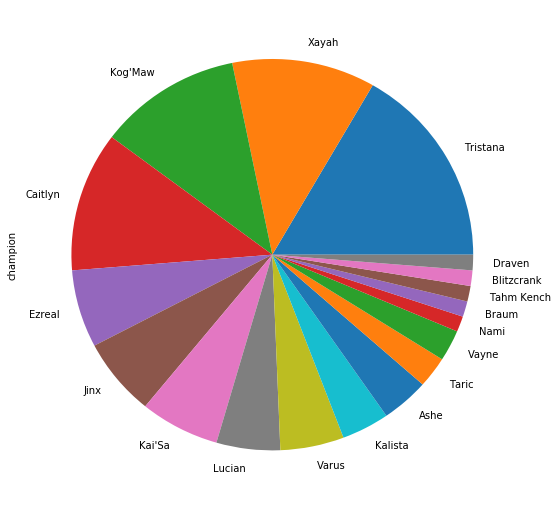

In [80]:
plt.figure(figsize=(9,9))
doubleLift['champion'].value_counts().plot.pie()

In [81]:
doubleLift.groupby('champion')['Won'].mean().sort_values(ascending=False)

champion
Blitzcrank    1.000000
Braum         1.000000
Taric         1.000000
Nami          1.000000
Lucian        0.750000
Kalista       0.666667
Jinx          0.600000
Caitlyn       0.555556
Xayah         0.555556
Tristana      0.461538
Kai'Sa        0.400000
Kog'Maw       0.333333
Ezreal        0.200000
Vayne         0.000000
Draven        0.000000
Tahm Kench    0.000000
Varus         0.000000
Ashe          0.000000
Name: Won, dtype: float64

In [82]:
doubleLift.columns

Index(['champion', 'gameId', 'lane', 'platformId', 'queue', 'role', 'season',
       'timestamp', 'player', 'accountId', 'id', 'name', 'profileIconId',
       'revisionDate', 'summonerLevel', 'Won'],
      dtype='object')

In [83]:
doubleLift.groupby('role')['Won'].mean()

role
DUO_CARRY      0.422535
DUO_SUPPORT    0.833333
SOLO           0.000000
Name: Won, dtype: float64

In [84]:
doubleLift.groupby('role')['Won'].count()

role
DUO_CARRY      71
DUO_SUPPORT     6
SOLO            1
Name: Won, dtype: int64

In [85]:
win_rate = pd.DataFrame([doubleLift.groupby('role')['Won'].count(),doubleLift.groupby('role')['Won'].mean()],\
                        index=['Games Played', 'Win Rate']).T
win_rate

,Games Played,Win Rate
role,,
DUO_CARRY,71.0,0.422535
DUO_SUPPORT,6.0,0.833333
SOLO,1.0,0.000000


In [91]:
durations = []
for match in DL_matches:
    durations.append(match['gameDuration'])

In [92]:
doubleLift['game_duration'] = durations

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Importing info about masteries/runes

In [121]:
json = [{"id":8126,"name":"Cheap Shot","tooltip":"Damaging champions with <b>impaired movement or actions</b> deals 12 - 30 bonus true damage (based on level).<br><br>Cooldown: 4s<br><rules>Activates on damage occurring after the impairment.</rules><br><hr><br>Current Damage: @f2@<br>Total bonus damage dealt: @f1@","shortDesc":"Deal bonus true damage to enemy champions with <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_ImpairAct\">impaired movement or actions</lol-uikit-tooltipped-keyword>. ","longDesc":"Damaging champions with <b>impaired movement or actions</b> deals 12 - 30 bonus true damage (based on level).<br><br>Cooldown: 4s<br><rules>Activates on damage occurring after the impairment.</rules>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/Bully/Bully.png","endOfGameStatDescs":["Total damage: @eogvar1@"]},{"id":8415,"name":"The Arcane Colossus","tooltip":"<pathResolve>Resolve</pathResolve> + <pathSorcery>Sorcery</pathSorcery><br>+130 Health","shortDesc":"<pathBonus><pathResolve>Resolve</pathResolve> + <pathSorcery>Sorcery</pathSorcery> Set Bonus</pathBonus>","longDesc":"+130 Health","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8017,"name":"Cut Down","tooltip":"Deal 4% more damage to champions with 150 more max health than you, increasing to 10% at 2000 more max health.<br><br><rules>Minimum bonus is 4%.<br>Maximum bonus is granted against champions with 2000 or more health than you.</rules><br><hr><br>Total bonus damage: <scaleAD>@f1@</scaleAD>","shortDesc":"Deal more damage to champions with more max health than you.","longDesc":"Deal 4% more damage to champions with 150 more max health than you, increasing to 10% at 2000 more max health.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/GiantSlayer/GiantSlayer.png","endOfGameStatDescs":["Total Bonus Damage: @eogvar1@"]},{"id":8139,"name":"Taste of Blood","tooltip":"Heal when you damage an enemy champion.<br><br>Healing: <font color='#ffffff'>@f2@</font> (+<scaleAD>@f3@</scaleAD>) (+<scaleAP>@f4@</scaleAP>)<br><br>Cooldown: 20s<br><hr><br>Total Healing: @f1@","shortDesc":"Heal when you damage an enemy champion.","longDesc":"Heal when you damage an enemy champion.<br><br>Healing: 18-35 (+0.2 bonus AD, +0.1 AP) health (based on level)<br><br>Cooldown: 20s","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/Feast/GreenTerror_Feast.png","endOfGameStatDescs":["Total Healing: @eogvar1@"]},{"id":8005,"name":"Press the Attack","tooltip":"Hitting an enemy champion with 3 consecutive basic attacks deals <scaleLevel>@f4@</scaleLevel> bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword> (based on level) and makes them vulnerable, increasing the damage they take by 12% from all sources for 6s.<br><hr><br>Bonus Damage Dealt: <scaleAD>@f2@</scaleAD><br>Total Exposure Damage: <scaleAD>@f3@</scaleAD>","shortDesc":"Hitting an enemy champion 3 consecutive times makes them vulnerable, dealing bonus damage and causing them to take more damage from all sources for 6s.","longDesc":"Hitting an enemy champion with 3 consecutive basic attacks deals 30 - 120 bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword> (based on level) and makes them vulnerable, increasing the damage they take by 12% from all sources for 6s.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/PressThreeAttacks/PressThreeAttacks.png","endOfGameStatDescs":["Total Damage: @eogvar1@","Bonus Damage: @eogvar2@","Expose Damage: @eogvar3@"]},{"id":8021,"name":"Fleet Footwork","tooltip":"Attacking and moving builds Energy stacks. At 100 stacks, your next attack is Energized.<br><br>Energized attacks heal you for <font color='#ffffff'>@f2@</font> (+<scaleAD>@f3@</scaleAD>) (+<scaleAP>@f4@</scaleAP>) and grant +30% Movement Speed for 1s.<br><rules>Healing is 60% as effective when used on a minion.</rules><br><hr><br>Total Healing: @f1@","shortDesc":"Attacking and moving builds Energy stacks. At 100 stacks, your next attack heals you and grants increased <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_MS\">MS</lol-uikit-tooltipped-keyword>.","longDesc":"Attacking and moving builds Energy stacks. At 100 stacks, your next attack is Energized.<br><br>Energized attacks heal you for 5 - 50 (+0.1 Bonus AD, +0.2 AP) and grant +30% Movement Speed for 1s.<br><rules>Healing is 60% as effective when used on a minion.</rules>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/KSFleetFootwork/KSFleetFootwork.png","endOfGameStatDescs":["Total Healing: @eogvar1@"]},{"id":8243,"name":"The Ultimate Hat","tooltip":"Your ultimate's cooldown is reduced by 5%. Each time you cast your ultimate, its cooldown is further reduced by 2%. Stacks up to 5 times.<br><hr><br>Ultimate Cooldown Reduction: +@f1*100@%<br>Stacks: @f3@/5","shortDesc":"Your ultimate's cooldown is reduced. Each time you cast your ultimate, its cooldown is further reduced.","longDesc":"Your ultimate's cooldown is reduced by 5%. Each time you cast your ultimate, its cooldown is further reduced by 2%. Stacks up to 5 times.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/UltiMore/UltiMore.png","endOfGameStatDescs":["Total Bonus CDR: @eogvar1@"]},{"id":8316,"name":"Minion Dematerializer","tooltip":"Start the game with 6 Minion Dematerializers that kill and absorb lane minions instantly. Minion Dematerializers are on cooldown for the first 155s of the game.<br><br>Absorbing a minion increases your damage by +4% against that type of minion permanently, and an extra +1% for each additional minion of that type absorbed.<br><br><hr><br>Melee Bonus Damage: +@f1@%<br>Caster Bonus Damage: +@f2@%<br>Siege Bonus Damage: +@f3@%","shortDesc":"Start the game with 6 Minion Dematerializers. Killing minions with the item gives permanent bonus damage vs. that minion type.","longDesc":"Start the game with 6 Minion Dematerializers that kill and absorb lane minions instantly. Minion Dematerializers are on cooldown for the first 155s of the game.<br><br>Absorbing a minion increases your damage by +4% against that type of minion permanently, and an extra +1% for each additional minion of that type absorbed.<br>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/TheClearChoice/TheClearChoice.png","endOfGameStatDescs":["Bonus Minion Damage Dealt: @eogvar1@"]},{"id":8004,"name":"The Brazen Perfect","tooltip":"<pathPrecision>Precision</pathPrecision> + <pathSorcery>Sorcery</pathSorcery><br>+18% Attack Speed","shortDesc":"<pathBonus><pathPrecision>Precision</pathPrecision> + <pathSorcery>Sorcery</pathSorcery> Set Bonus</pathBonus>","longDesc":"+18% Attack Speed","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":9104,"name":"Legend: Alacrity","tooltip":"Gain 3% attack speed plus an additional 1.5% for every <i>Legend</i> stack (max 10 stacks).<br><br>Earn progress toward <i>Legend</i> stacks for every champion takedown, epic monster takedown, large monster kill, and minion kill.<br><hr><br>Total Attack Speed added: <scaleAD>@f1*100@%</scaleAD> (@f3@ of 10)<br>Progress towards next stack: @f2@%","shortDesc":"<lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">Takedowns</lol-uikit-tooltipped-keyword> on enemies grant permanent <b>Attack Speed</b>. ","longDesc":"Gain 3% attack speed plus an additional 1.5% for every <i>Legend</i> stack (max 10 stacks).<br><br>Earn progress toward <i>Legend</i> stacks for every champion takedown, epic monster takedown, large monster kill, and minion kill.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/Legend_Heroism.png","endOfGameStatDescs":["Time Completed: @eogvar1@:@eogvar2@"]},{"id":8220,"name":"The Calamity","tooltip":"<pathSorcery>Sorcery</pathSorcery> + <pathDomination>Domination</pathDomination><br>+15 Attack Damage or +25 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathSorcery>Sorcery</pathSorcery> + <pathDomination>Domination</pathDomination> Set Bonus</pathBonus>","longDesc":"+15 Attack Damage or +25 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8016,"name":"The Merciless Elite","tooltip":"<pathPrecision>Precision</pathPrecision> + <pathDomination>Domination</pathDomination><br>+18% Attack Speed","shortDesc":"<pathBonus><pathPrecision>Precision</pathPrecision> + <pathDomination>Domination</pathDomination> Set Bonus</pathBonus>","longDesc":"+18% Attack Speed","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8439,"name":"Aftershock","tooltip":"After immobilizing an enemy champion, increase your Armor and Magic Resist by 20 + 30% for 2.5s. Then explode, dealing magic damage to nearby enemies.<br><br>Damage: 40 - 140 (+3.5% of your maximum health)<br>Cooldown: 20s<br><hr><br>Total damage dealt: <scaleAD>@f1@</scaleAD><br>Armor buff: @f2@<br>Magic Resist buff: @f3@","shortDesc":"After <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Immobilize\">immobilizing</lol-uikit-tooltipped-keyword> an enemy champion gain defenses and later deal a burst of <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_AdaptiveDmg\">adaptive damage</lol-uikit-tooltipped-keyword> around you.","longDesc":"After immobilizing an enemy champion, increase your Armor and Magic Resist by 20 + 30% for 2.5s. Then explode, dealing magic damage to nearby enemies.<br><br>Damage: 40 - 140 (+3.5% of your maximum health)<br>Cooldown: 20s","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/VeteranVengeance/VeteranVengeance.png","endOfGameStatDescs":["Total Damage Dealt: @eogvar1@"]},{"id":8345,"name":"Biscuit Delivery","tooltip":"Biscuit Delivery: Gain a Total Biscuit of Everlasting Will every 3 mins, until 12 min.<br><br>Biscuits restore 15% of your missing health and mana. Consuming any Biscuit increases your mana cap by 40 mana permanently. <br><br><i>Manaless:</i> Champions without mana restore 20% missing health instead.<br><hr><br>Biscuits Gained: @f1@/@f2@","shortDesc":"Gain a free Biscuit every 3 min, until 12 min. Consuming a Biscuit permanently increases your max mana and restores health and mana.","longDesc":"Biscuit Delivery: Gain a Total Biscuit of Everlasting Will every 3 mins, until 12 min.<br><br>Biscuits restore 15% of your missing health and mana. Consuming any Biscuit increases your mana cap by 40 mana permanently. <br><br><i>Manaless:</i> Champions without mana restore 20% missing health instead.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/BiscuitsAndBonuses/BiscuitsAndBonuses.png","endOfGameStatDescs":["Biscuits Received: @eogvar1@"]},{"id":8008,"name":"Lethal Tempo","tooltip":"1.5s after damaging a champion gain 30 - 80% Attack Speed (based on level) for 3s. Attacking a champion extends the effect to 6s.<br><br>Cooldown: 10s<br><br>Lethal Tempo allows you to temporarily exceed the attack speed limit.<br><hr><br>Total Time Active: @f1@s","shortDesc":"1.5s after damaging a champion gain a large amount of Attack Speed. Lethal Tempo allows you to temporarily exceed the attack speed limit.","longDesc":"1.5s after damaging a champion gain 30 - 80% Attack Speed (based on level) for 3s. Attacking a champion extends the effect to 6s.<br><br>Cooldown: 10s<br><br>Lethal Tempo allows you to temporarily exceed the attack speed limit.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/FlowofBattle/FlowofBattleTemp.png","endOfGameStatDescs":["Total Active Time: @eogvar1@"]},{"id":8128,"name":"Dark Harvest","tooltip":"Champions, large minions, and large monsters drop soul essence on death. Collect souls to become <font color='#c60300'>Soul Charged</font>. Your next attack on a champion or structure consumes <font color='#c60300'>Soul Charged</font> to deal bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword>.<br><br><font color='#c60300'>Soul Charged</font> lasts 20s, increased to 300s after collecting 150 soul essence.<br><br>Bonus damage: <font color='#ffffff'>@f2@</font> (+<scaleAD>@f5@</scaleAD>) (+<scaleAP>@f6@</scaleAP>) + <font color='#c60300'>@f3@ soul essence</font><br><rules><br>Champions - 6 soul essence.<br>Monsters - 2 soul essence.<br>Minions - 4 soul essence.</rules><br><br><hr><br>Total Damage Dealt: <font color='#ffffff'>@f1@</font>","shortDesc":"Champions, large minions, and large monsters drop soul essence on death. Touch souls to absorb them and deal bonus <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_AdaptiveDmg\">adaptive damage</lol-uikit-tooltipped-keyword> on your next attack based on total soul essence collected.","longDesc":"Champions, large minions, and large monsters drop soul essence on death. Collect souls to become <font color='#c60300'>Soul Charged</font>. Your next attack on a champion or structure consumes <font color='#c60300'>Soul Charged</font> to deal bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword>.<br><br><font color='#c60300'>Soul Charged</font> lasts 20s, increased to 300s after collecting 150 soul essence.<br><br>Bonus damage: 40 - 80 (+<scaleAD>0.25 bonus AD</scaleAD>) (+<scaleAP>0.2 AP</scaleAP>) + soul essence collected.<br><rules><br>Champions - 6 soul essence.<br>Monsters - 2 soul essence.<br>Minions - 4 soul essence.</rules>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/KSSoulReaper/KSSoulReaper.png","endOfGameStatDescs":["Total Damage Dealt: @eogvar1@"]},{"id":8347,"name":"Cosmic Insight","tooltip":"+5% CDR<br>+5% Max CDR<br>+5% Summoner Spell CDR<br>+5% Item CDR","shortDesc":"+5% <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_CDR\">CDR</lol-uikit-tooltipped-keyword><br>+5% Max CDR<br>+5% Summoner Spell CDR<br>+5% Item CDR","longDesc":"+5% CDR<br>+5% Max CDR<br>+5% Summoner Spell CDR<br>+5% Item CDR","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/Intelligence/Intelligence.png","endOfGameStatDescs":["--"]},{"id":8410,"name":"Approach Velocity","tooltip":"Gain 10% Movement Speed towards nearby ally champions that are movement impaired or enemy champions that you impair. <br><br>Range: 1000<br><hr><br>Time Spent Hasted: @f1@s","shortDesc":"Bonus <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_MS\">MS</lol-uikit-tooltipped-keyword> towards nearby ally champions that are <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_ImpairMov\">movement impaired</lol-uikit-tooltipped-keyword> or enemy champions that you impair.","longDesc":"Gain 10% Movement Speed towards nearby ally champions that are movement impaired or enemy champions that you impair. <br><br>Range: 1000","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/HotPursuit/HotPursuit.png","endOfGameStatDescs":["Time Spent Hasted: @eogvar1@"]},{"id":8210,"name":"Transcendence","tooltip":"Gain 10% CDR when you reach level 10.<br><br>Each percent of CDR exceeding the CDR limit is converted to an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of 1.2 Attack Damage or 2 Ability Power.<br><hr><br>Cooldown Reduction: +@f4*100@%<br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"Gain 10% <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_CDR\">CDR</lol-uikit-tooltipped-keyword> when you reach level 10. Excess CDR becomes AP or AD, <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Adaptive\">adaptive</lol-uikit-tooltipped-keyword>.","longDesc":"Gain 10% CDR when you reach level 10.<br><br>Each percent of CDR exceeding the CDR limit is converted to an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of 1.2 Attack Damage or 2 Ability Power.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/Overcharger/Overcharger.png","endOfGameStatDescs":["Total adaptive stat gained: @eogvar1@"]},{"id":8313,"name":"Perfect Timing","tooltip":"Start the game with a Commencing Stopwatch that transforms into a Stopwatch after 6 min. Stopwatch has a one time use Stasis effect.<br><br>Reduces the cooldown of Zhonya's Hourglass, Guardian Angel, and Gargoyle Stoneplate by 15%.","shortDesc":"Gain a free Stopwatch. Stopwatch has a one time use <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Stasis\">Stasis</lol-uikit-tooltipped-keyword> effect.","longDesc":"Start the game with a Commencing Stopwatch that transforms into a Stopwatch after 6 min. Stopwatch has a one time use Stasis effect.<br><br>Reduces the cooldown of Zhonya's Hourglass, Guardian Angel, and Gargoyle Stoneplate by 15%.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Style5/AllInGoodTime/AllInGoodTime.png","endOfGameStatDescs":["Timing: Perfect"]},{"id":8234,"name":"Celerity","tooltip":"Gain 4% increased Movement Speed and add 8% of your Bonus Movement Speed to your AP or AD, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword>. <br><hr><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"Gain 4% extra <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_MS\">MS</lol-uikit-tooltipped-keyword>. Gain extra AP or AD, <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Adaptive\">adaptive</lol-uikit-tooltipped-keyword> based on your bonus MS. ","longDesc":"Gain 4% increased Movement Speed and add 8% of your Bonus Movement Speed to your AP or AD, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword>. ","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/SpeedDemon/SpeedDemonTemp.png","endOfGameStatDescs":["Total Bonus AD/AP: @eogvar1@"]},{"id":9105,"name":"Legend: Tenacity","tooltip":"Gain 5% tenacity plus an additional 1.5% for every <i>Legend</i> stack (max 10 stacks).<br><br>Earn progress toward <i>Legend</i> stacks for every champion takedown, epic monster takedown, large monster kill, and minion kill.<br><hr><br>Total tenacity granted: <scaleAD>@f1*100@%</scaleAD> (@f3@ of 10)<br>Progress towards next stack: @f2@%","shortDesc":"<lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">Takedowns</lol-uikit-tooltipped-keyword> on enemies grant permanent <b>Tenacity</b>. ","longDesc":"Gain 5% tenacity plus an additional 1.5% for every <i>Legend</i> stack (max 10 stacks).<br><br>Earn progress toward <i>Legend</i> stacks for every champion takedown, epic monster takedown, large monster kill, and minion kill.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/Legend_Tenacity.png","endOfGameStatDescs":["Time Completed: @eogvar1@:@eogvar2@"]},{"id":8429,"name":"Conditioning","tooltip":"After 10 min gain +8 Armor and +8 Magic Resist and increase your Armor and Magic Resist by 5%.<br><br>Armor Gained: @f3@ <scaleArmor>(+@f4@)</scaleArmor><br>Resist Gained: @f5@ <scaleMR>(+@f6@)</scaleMR>","shortDesc":"After 10 min gain +8 Armor and +8 Magic Resist and increase your Armor and Magic Resist by 5%.","longDesc":"After 10 min gain +8 Armor and +8 Magic Resist and increase your Armor and Magic Resist by 5%.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/NemFighter/NemFighter.png","endOfGameStatDescs":["Percent of game active: @eogvar1@%"]},{"id":8214,"name":"Summon Aery","tooltip":"Your attacks and abilities send Aery to a target, damaging enemy champions or shielding allies. Aery cannot be sent out again until she returns to you.<br><br>Damage: <font color='#FFFFFF'>@f5@</font> (+<scaleAP>@f6@</scaleAP>) (+<scaleAD>@f7@</scaleAD>)<br>Shield: <font color='#FFFFFF'>@f8@</font> (+<scaleAP>@f9@</scaleAP>) (+<scaleAD>@f10@</scaleAD>) <br><hr><br>Aery has attacked enemies <font color='#FFFFFF'>@f1@</font> times for a total of <font color='#FFFFFF'>@f3@</font> damage.<br>Aery has helped allies <font color='#FFFFFF'>@f2@</font> times, shielding a total of <font color='#FFFFFF'>@f4@</font> damage.","shortDesc":"Your attacks and abilities send Aery to a target, damaging enemies or shielding allies.","longDesc":"Your attacks and abilities send Aery to a target, damaging enemy champions or shielding allies.<br><br>Damage: 15 - 40 based on level (+<scaleAP>0.1 AP</scaleAP> and +<scaleAD>0.15 bonus AD</scaleAD>)<br>Shield: 30 - 80 based on level (+<scaleAP>0.25 AP</scaleAP> and +<scaleAD>0.4 bonus AD</scaleAD>) <br><br>Aery cannot be sent out again until she returns to you.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/KSPerxie/KSPerxie.png","endOfGameStatDescs":["Damage Dealt: @eogvar1@","Damage Shielded: @eogvar2@"]},{"id":8435,"name":"Mirror Shell","tooltip":"Gain +5 Magic Resist. <br><br>Heal effects from consumables, heals for at least 20 health and shields increase your Magic Resist by 5% for 3s. ","shortDesc":"Gain +5 Magic Resist. <br>Heals, including consumables, increase your Magic Resist by 5% temporarily.<br>","longDesc":"Gain +5 Magic Resist. <br><br>Heal effects from consumables, heals for at least 20 health and shields increase your Magic Resist by 5% for 3s. ","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/NemMage/NemMage.png","endOfGameStatDescs":["Bonus Magic Resist: @eogvar1@"]},{"id":8115,"name":"The Aether Blade","tooltip":"<pathDomination>Domination</pathDomination> + <pathSorcery>Sorcery</pathSorcery><br>+11 Attack Damage or +18 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathDomination>Domination</pathDomination> + <pathSorcery>Sorcery</pathSorcery> Set Bonus</pathBonus>","longDesc":"+11 Attack Damage or +18 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8229,"name":"Arcane Comet","tooltip":"Damaging a champion with an ability hurls a comet at their location, or, if Arcane Comet is on cooldown, reduces its remaining cooldown.<br><rules><br>Cooldown Reduction:<br>Single Target: 20%.<br>Area of Effect: 10%.<br>Damage over Time: 5%.<br></rules><br>Damage: <font color='#FFFFFF'>@f5@</font> (+<scaleAP>@f6@</scaleAP>) (+<scaleAD>@f7@</scaleAD>)<br>Cooldown: @f2@s<br><hr><br>You have hit with @f3@% of comets fired, for a total of @f1@ damage to champions.","shortDesc":"Damaging a champion with an ability hurls a damaging comet at their location.","longDesc":"Damaging a champion with an ability hurls a comet at their location, or, if Arcane Comet is on cooldown, reduces its remaining cooldown.<br><br><lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>Adaptive Damage</font></lol-uikit-tooltipped-keyword>: 30 - 100 based on level (<scaleAP>+0.2 AP</scaleAP> and <scaleAD>+0.35 bonus AD</scaleAD>)<br>Cooldown: 20 - 8s<br><rules><br>Cooldown Reduction:<br>Single Target: 20%.<br>Area of Effect: 10%.<br>Damage over Time: 5%.<br></rules>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/KSDoomsayer/KSDoomsayer.png","endOfGameStatDescs":["Total Damage Dealt: @eogvar1@"]},{"id":8135,"name":"Ravenous Hunter","tooltip":"Heal for a percentage of the damage dealt by your abilities.<br>Healing: 2.5% + 2.5% per <i>Bounty Hunter</i> stack. <br><br>Earn a <i>Bounty Hunter</i> stack the first time you get a takedown on each enemy champion.<br><rules><br>Healing reduced to one third for Area of Effect abilities.</rules><br><br><hr><br>Stacks earned: @f1@/5<br>Current Healing: @f2.1@%","shortDesc":"<b>Unique</b> <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">takedowns</lol-uikit-tooltipped-keyword> grant permanent healing from ability damage. ","longDesc":"Heal for a percentage of the damage dealt by your abilities.<br>Healing: 2.5% + 2.5% per <i>Bounty Hunter</i> stack. <br><br>Earn a <i>Bounty Hunter</i> stack the first time you get a takedown on each enemy champion.<br><rules><br>Healing reduced to one third for Area of Effect abilities.</rules><br>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/InsatiableHunter/InsatiableHunter.png","endOfGameStatDescs":["Total Stacks: @eogvar1@"]},{"id":8224,"name":"Nullifying Orb","tooltip":"When you take magic damage that would reduce your Health below 30%, gain a shield that absorbs <font color='#ffffff'>@f2@</font> (+<scaleAD>@f3@</scaleAD>) (+<scaleAP>@f4@</scaleAP>) magic damage for 4s.<br><br>Cooldown: 60s<br><hr><br>Total Magic Damage Blocked: @f1@","shortDesc":"Gain a magic damage shield when taken to low health by magic damage.","longDesc":"When you take magic damage that would reduce your Health below 30%, gain a shield that absorbs 40 - 120 magic damage based on level (<scaleAP>+0.1 AP</scaleAP> and <scaleAD>+0.15 bonus AD</scaleAD>) for 4s.<br><br>Cooldown: 60s","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/PokeShield/Pokeshield.png","endOfGameStatDescs":["Total shield granted: @eogvar1@"]},{"id":8465,"name":"Guardian","tooltip":"<i>Guard</i> allies within 175 units of you, and allies you target with spells for 2.5s. While <i>Guarding</i>, if you or the ally take damage, both of you gain a shield and are hasted for 1.5s.<br><hr><br>Cooldown: 45s<br>Current shield strength: @f2@ + (<scaleAP>@f3@</scaleAP>) + (<scaleHealth>@f4@</scaleHealth>).<br>Haste: 20% increased Movement Speed.","shortDesc":"Guard allies you cast spells on and those that are very nearby. If you or a guarded ally would take damage, you're both hasted and granted a shield.","longDesc":"<i>Guard</i> allies within 175 units of you, and allies you target with spells for 2.5s. While <i>Guarding</i>, if you or the ally take damage, both of you gain a shield and are hasted for 1.5s.<br><br>Cooldown: 45s<br>Shield: 60 - 150 +(<scaleAP>0.2 AP</scaleAP>) + (<scalehealth>+10% bonus health</scalehealth>).<br>Haste: +20% Movement Speed.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/KSBuddyShield/KSBuddyShield.png","endOfGameStatDescs":["Total Shield Strength: @eogvar1@"]},{"id":8451,"name":"Overgrowth","tooltip":"Permanently gain 0.2% maximum health for every 8 monsters or enemy minions that die near you.<br><hr><br>Total Max Health Earned: <scaleHealth>@f1@ (@f2*100.1@%)</scaleHealth>","shortDesc":"Gain additional permanent max health when minions or monsters die near you.","longDesc":"Permanently gain 0.2% maximum health for every 8 monsters or enemy minions that die near you.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/HealthBandit/HealthBandit.png","endOfGameStatDescs":["Total Bonus Max Health: @eogvar1@"]},{"id":8454,"name":"The Leviathan","tooltip":"<pathResolve>Resolve</pathResolve> + <pathDomination>Domination</pathDomination><br>+130 Health","shortDesc":"<pathBonus><pathResolve>Resolve</pathResolve> + <pathDomination>Domination</pathDomination> Set Bonus</pathBonus>","longDesc":"+130 Health","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8138,"name":"Eyeball Collection","tooltip":"Collect eyeballs for champion and ward takedowns. Gain an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of 0.6 Attack Damage or 1 Ability Power, per eyeball collected. <br><br>Upon completing your collection at 20 eyeballs, additionally gain an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of 6 Attack Damage, or 10 Ability Power.<br><br>Collect 2 eyeballs per champion takedown, 1 eyeball per ward takedown.<br><hr><br>Adapative Force Gained: @f1@<br>Eyeballs Collected: @f3@/20","shortDesc":"Collect eyeballs for champion and ward <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">takedowns</lol-uikit-tooltipped-keyword>. Gain permanent AD or AP, <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Adaptive\">adaptive</lol-uikit-tooltipped-keyword> for each eyeball plus bonus upon collection completion.","longDesc":"Collect eyeballs for champion and ward takedowns. Gain an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of 0.6 Attack Damage or 1 Ability Power, per eyeball collected. <br><br>Upon completing your collection at 20 eyeballs, additionally gain an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of 6 Attack Damage, or 10 Ability Power.<br><br>Collect 2 eyeballs per champion takedown, 1 eyeball per ward takedown.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/WardSlayer/WardSlayer.png","endOfGameStatDescs":["Total Bonus AD/AP: @eogvar1@"]},{"id":8207,"name":"The Cryptic","tooltip":"<pathSorcery>Sorcery</pathSorcery> + <pathInspiration>Inspiration</pathInspiration><br>+15 Attack Damage or +25 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathSorcery>Sorcery</pathSorcery> + <pathInspiration>Inspiration</pathInspiration> Set Bonus</pathBonus>","longDesc":"+15 Attack Damage or +25 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8230,"name":"Phase Rush","tooltip":"Hitting an enemy champion with 3 attacks or <b>separate</b> abilities within 3s grants 15 - 40% Movement Speed based on level.<br><br>Duration: 3s<br>Cooldown: 15s<br><i>Melee:</i> Additionally, gain 75% Slow Resistance for the duration.<br><hr><br>Haste Bonus: @f2.2*100@%","shortDesc":"Hitting an enemy champion with 3 <b>separate</b> attacks or abilities grants a burst of <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_MS\">MS</lol-uikit-tooltipped-keyword>. ","longDesc":"Hitting an enemy champion with 3 attacks or <b>separate</b> abilities within 3s grants 15 - 40% Movement Speed based on level.<br><br>Duration: 3s<br>Cooldown: 15s<br><i>Melee:</i> Additionally, gain 75% Slow Resistance for the duration.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/KSSpellslingersSurge/KSSpellslingersSurge.png","endOfGameStatDescs":["Total activations: @eogvar1@"]},{"id":8109,"name":"The Ingenious Hunter","tooltip":"<pathDomination>Domination</pathDomination> + <pathInspiration>Inspiration</pathInspiration><br>+11 Attack Damage or +18 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathDomination>Domination</pathDomination> + <pathInspiration>Inspiration</pathInspiration> Set Bonus</pathBonus>","longDesc":"+11 Attack Damage or +18 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8105,"name":"Relentless Hunter","tooltip":"Gain 8 <b>out of combat Movement Speed</b> plus 8 per <i>Bounty Hunter</i> stack.<br><br>Earn a <i>Bounty Hunter</i> stack the first time you get a takedown on each enemy champion.<br><hr><br>Stacks earned: @f1@/5","shortDesc":"<b>Unique</b> <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">takedowns</lol-uikit-tooltipped-keyword> grant permanent <b>out of combat <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_MS\">MS</lol-uikit-tooltipped-keyword></b>. ","longDesc":"Gain 8 <b>out of combat Movement Speed</b> plus 8 per <i>Bounty Hunter</i> stack.<br><br>Earn a <i>Bounty Hunter</i> stack the first time you get a takedown on each enemy champion.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/ProlificHunter/ProlificHunter.png","endOfGameStatDescs":["Total Stacks: @eogvar1@"]},{"id":8453,"name":"Revitalize","tooltip":"Heals and shields you cast are 5% stronger and increased by an additional 10% on targets below 40% health.<br><hr><br><scaleAD>Bonus healing</scaleAD>: @f1@<br><scaleAD>Bonus shielding</scaleAD>: @f2@","shortDesc":"Heals and shields you cast are 5% stronger and increased by an additional 10% on low health targets.","longDesc":"Heals and shields you cast are 5% stronger and increased by an additional 10% on targets below 40% health.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/AmpShields/AmpShields.png","endOfGameStatDescs":["Bonus Healing: @eogvar1@","Bonus Shielding: @eogvar2@"]},{"id":8232,"name":"Waterwalking","tooltip":"Gain 25 Movement Speed and an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of up to 18 Attack Damage or 30 Ability Power (based on level) when in the river.","shortDesc":"Gain <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_MS\">MS</lol-uikit-tooltipped-keyword> and AP or AD, <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Adaptive\">adaptive</lol-uikit-tooltipped-keyword> in the river.","longDesc":"Gain 25 Movement Speed and an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of up to 18 Attack Damage or 30 Ability Power (based on level) when in the river.<br><br><hr></hr><br><i>May you be as swift as the rushing river and agile as a startled Rift Scuttler.</i><br>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/Roamer/Roamer.png","endOfGameStatDescs":["Total Bonus AD/AP: @eogvar1@"]},{"id":8414,"name":"The Imperious Behemoth","tooltip":"<pathResolve>Resolve</pathResolve> + <pathPrecision>Precision</pathPrecision><br>+130 Health","shortDesc":"<pathBonus><pathResolve>Resolve</pathResolve> + <pathPrecision>Precision</pathPrecision> Set Bonus</pathBonus>","longDesc":"+130 Health","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8320,"name":"The Timeless","tooltip":"<pathInspiration>Inspiration</pathInspiration> + <pathResolve>Resolve</pathResolve><br>+20% Potion and Elixir Duration<br>+145 Health","shortDesc":"<pathBonus><pathInspiration>Inspiration</pathInspiration> + <pathResolve>Resolve</pathResolve> Set Bonus</pathBonus>","longDesc":"+20% Potion and Elixir Duration<br>+145 Health","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":9111,"name":"Triumph","tooltip":"Takedowns restore 15% of your missing health and grant an additional 25 gold. <br><hr><br>Total health restored: <scaledAD>@f1@</scaleAD><br>Total bonus gold granted: <scaledAD>@f2@</scaleAD>","shortDesc":"<lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">Takedowns</lol-uikit-tooltipped-keyword> restore 15% of your missing health and grant an additional 25 gold. ","longDesc":"Takedowns restore 15% of your missing health and grant an additional 25 gold. <br><br><hr></hr><br><i>'The most dangerous game brings the greatest glory.' <br>—Noxian Reckoner</i>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/DangerousGame.png","endOfGameStatDescs":["Total Health Restored: @eogvar1@"]},{"id":8233,"name":"Absolute Focus","tooltip":"While above 70% health, gain an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of up to 24 Attack Damage or 40 Ability Power (based on level).<br><hr><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"While above 70% health, gain extra <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_AdaptiveDmg\">adaptive damage</lol-uikit-tooltipped-keyword>.","longDesc":"While above 70% health, gain an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of up to 24 Attack Damage or 40 Ability Power (based on level).","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/FlawlessCombatant/FlawlessCombatant.png","endOfGameStatDescs":["Total time active: @eogvar1@"]},{"id":8319,"name":"The Stargazer","tooltip":"<pathInspiration>Inspiration</pathInspiration> + <pathSorcery>Sorcery</pathSorcery><br>+20% Potion and Elixir Duration<br>+16 Attack Damage or +27 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathInspiration>Inspiration</pathInspiration> + <pathSorcery>Sorcery</pathSorcery> Set Bonus</pathBonus>","longDesc":"+20% Potion and Elixir Duration<br>+16 Attack Damage or +27 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8009,"name":"Presence of Mind","tooltip":"For 5s after gaining a level or takedown any mana you spend is fully restored.<br><hr><br>Mana from Leveling: <scaleAD>@f2@</scaleAD><br>Mana from Takedowns: <scaleAD>@f3@</scaleAD>","shortDesc":"For 5s after gaining a level or takedown any mana you spend is fully restored.","longDesc":"For 5s after gaining a level or takedown any mana you spend is fully restored.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/LastResort/LastResortIcon.png","endOfGameStatDescs":["Total Mana Restored: @eogvar1@"]},{"id":8143,"name":"Sudden Impact","tooltip":"After exiting stealth or using a dash, leap, blink, or teleport, dealing any damage to a champion grants you 10 Lethality and 8 Magic Penetration for 5s.<br><br>Cooldown: 4s<br><hr><br>Bonus champion damage: @f1@","shortDesc":"Gain a burst of Lethality and Magic Penetration after using a dash, leap, blink, teleport, or when leaving stealth.","longDesc":"After exiting stealth or using a dash, leap, blink, or teleport, dealing any damage to a champion grants you 10 Lethality and 8 Magic Penetration for 5s.<br><br>Cooldown: 4s","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/DashAttack/DashAttack.png","endOfGameStatDescs":["Bonus Damage: @eogvar1@"]},{"id":9103,"name":"Legend: Bloodline","tooltip":"Gain 0.8% life steal for every <i>Legend</i> stack (max 10 stacks).<br><br>Earn progress toward <i>Legend</i> stacks for every champion takedown, epic monster takedown, large monster kill, and minion kill.<br><hr><br>Total Life Steal Granted: <scaleAD>@f1*100@%</scaleAD> (@f3@ of 10)<br>Progress Towards Next Stack: @f2@%","shortDesc":"<lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">Takedowns</lol-uikit-tooltipped-keyword> on enemies grant permanent<b> Lifesteal</b>. ","longDesc":"Gain 0.8% life steal for every <i>Legend</i> stack (max 10 stacks).<br><br>Earn progress toward <i>Legend</i> stacks for every champion takedown, epic monster takedown, large monster kill, and minion kill.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/Legend_Infamy.png","endOfGameStatDescs":["Time Completed: @eogvar1@:@eogvar2@"]},{"id":8014,"name":"Coup de Grace","tooltip":"Deal 10% more damage to champions who have less than 40% health.<br><br>Additionally, takedowns on champions grant an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of 9 Attack Damage or 15 Ability Power for 10s.<br><hr><br>Total bonus damage dealt: <scaleAD>@f1@</scaleAD>","shortDesc":"Deal more damage to low health enemy champions.","longDesc":"Deal 10% more damage to champions who have less than 40% health.<br><br>Additionally, takedowns on champions grant an <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword> bonus of 9 Attack Damage or 15 Ability Power for 10s.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/CoupDeGrace/CoupDeGrace.png","endOfGameStatDescs":["Total Bonus Damage: @eogvar1@"]},{"id":8237,"name":"Scorch","tooltip":"Your next ability hit sets champions on fire dealing 30 - 60 bonus magic damage based on level after 1s.<br><br>Cooldown: 20s<br><hr><br>Current Damage: @f2@<br>Total Damage Dealt: @f1@","shortDesc":"Your first ability hit every 20s burns champions.","longDesc":"Your next ability hit sets champions on fire dealing 30 - 60 bonus magic damage based on level after 1s.<br><br>Cooldown: 20s","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/Spellburn/Spellburn.png","endOfGameStatDescs":["Total Bonus Damage: @eogvar1@"]},{"id":8446,"name":"Demolish","tooltip":"Charge up a powerful attack against a tower over 4s, while within 600 range of it. The charged attack deals 125 (+30% of your max health) bonus physical damage.<br><br>Cooldown: 45s<br><hr><br>Cooldown remaining: <scaleAD>@f2@</scaleAD><br>Total bonus damage: <scaleAD>@f1@</scaleAD>","shortDesc":"Charge up a powerful attack against a tower while near it.","longDesc":"Charge up a powerful attack against a tower over 4s, while within 600 range of it. The charged attack deals 125 (+30% of your max health) bonus physical damage.<br><br>Cooldown: 45s","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/BrickHitHouse/BrickHitHouse.png","endOfGameStatDescs":["Total Bonus Damage: @eogvar1@"]},{"id":8226,"name":"Manaflow Band","tooltip":"Every 60s, your next ability used has its mana or energy cost refunded, and restores 8% of your missing mana or energy.<br><hr><br>Total resource restored: @f1@","shortDesc":"Periodically your next ability used has its mana or energy cost refunded and restores some of your missing mana or energy.","longDesc":"Every 60s, your next ability used has its mana or energy cost refunded, and restores 8% of your missing mana or energy.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/Clearcasting/Clearcasting.png","endOfGameStatDescs":["Total resource refunded: @eogvar1@"]},{"id":8114,"name":"The Immortal Butcher","tooltip":"<pathDomination>Domination</pathDomination> + <pathResolve>Resolve</pathResolve><br>+11 Attack Damage or +18 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathDomination>Domination</pathDomination> + <pathResolve>Resolve</pathResolve> Set Bonus</pathBonus>","longDesc":"+11 Attack Damage or +18 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8437,"name":"Grasp of the Undying","tooltip":"Every 4s in combat, your next basic attack on a champion will: <li>Deal bonus magic damage equal to 4% of your max health</li><li>Heal you for 2% of your max health</li><li>Permanently increase your health by 5</li><br><rules><i>Ranged Champions:</i> Damage and healing are halved and gain 2 permanent health instead.</rules><br><hr><br>Damage to Champions: <scaleHealth>@f1@</scaleHealth><br>Total Healing: <scaleHealth>@f2@</scaleHealth><br>Total Health Increase: <scaleHealth>@f3.-1@</scaleHealth>","shortDesc":"Every 4s your next attack on a champion deals bonus magic damage, heals you, and permanently increases your health.","longDesc":"Every 4s in combat, your next basic attack on a champion will: <li>Deal bonus magic damage equal to 4% of your max health</li><li>Heal you for 2% of your max health</li><li>Permanently increase your health by 5</li><br><rules><i>Ranged Champions:</i> Damage and healing are halved and gain 2 permanent health instead.</rules>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/KSRuinedKing/KSRuinedKing.png","endOfGameStatDescs":["Total damage: @eogvar1@","Total Healing: @eogvar2@"]},{"id":8112,"name":"Electrocute","tooltip":"Hitting a champion with 3 <b>separate</b> attacks or abilities within 3s deals bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword>.<br>Cooldown: 50 - 25s<br><hr><br>Current damage: @f2@ (<scaleAP>+@f3@</scaleAP>) (<scaleAD>+@f4@</scaleAD>)<br>Total Damage Dealt: <scaleAD>@f1@</scaleAD>","shortDesc":"Hitting a champion with 3 <b>separate</b> attacks or abilities in 3s deals bonus <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_AdaptiveDmg\">adaptive damage</lol-uikit-tooltipped-keyword>.","longDesc":"Hitting a champion with 3 <b>separate</b> attacks or abilities within 3s deals bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword>.<br><br>Damage: 50 - 220 (+0.5 bonus AD, +0.3 AP) damage.<br><br>Cooldown: 50 - 25s<br><br><hr></hr><i>'We called them the Thunderlords, for to speak of their lightning was to invite disaster.'</i>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/TLords/TLords.png","endOfGameStatDescs":["Total Damage Dealt: @eogvar1@"]},{"id":8318,"name":"The Ruthless Visionary","tooltip":"<pathInspiration>Inspiration</pathInspiration> + <pathDomination>Domination</pathDomination><br>+20% Potion and Elixir Duration<br>+16 Attack Damage or +27 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathInspiration>Inspiration</pathInspiration> + <pathDomination>Domination</pathDomination> Set Bonus</pathBonus>","longDesc":"+20% Potion and Elixir Duration<br>+16 Attack Damage or +27 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8124,"name":"Predator","tooltip":"Enchants your boots with the active effect <font color='#c60300'>Predator</font>.<br><br>Channel for 1.5s without taking or dealing damage to gain <font color='#FFFFFF'>@f8@%</font> increased movement speed for 15s. Damaging attacks or abilities end this effect, dealing <font color='#FFFFFF'>@f3@</font> <font color='#99FF99'>(+@f5@)</font> <font color='#FF8C00'>(+@f4@)</font> bonus damage. <br><br>Cooldown: @f7@s<br><hr><br>Damage Dealt To Champions: @f1@","shortDesc":"Add an active effect to your boots that grants a large boost of <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_MS\">MS</lol-uikit-tooltipped-keyword> and causes your next attack or ability to deal bonus <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_AdaptiveDmg\">adaptive damage</lol-uikit-tooltipped-keyword>.","longDesc":"Enchants your boots with the active effect '<font color='#c60300'>Predator</font>.'<br><br>Channel for 1.5s out of combat to gain 45% movement speed for 15s. Damaging attacks or abilities end this effect, dealing 60 - 180 (+<scaleAD>0.4</scaleAD> bonus AD)(+<scaleAP>0.25</scaleAP> AP) bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword>.<br><br>Cooldown: 150s - 100s. Starts the game on cooldown and goes on cooldown if interrupted while channeling.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/KSLycanthropy/KSLycanthropy.png","endOfGameStatDescs":["Total Damage to Champions: @eogvar1@"]},{"id":8359,"name":"Kleptomancy","tooltip":"After using an ability, your next attack will grant bonus gold if used on a champion. There's a chance you'll also gain a consumable.<br><hr><br>Gold Gained: @f1@<br>Items Looted: @f3@","shortDesc":"After using an ability, your next attack will grant bonus gold if used on a champion. There's a chance you'll also gain a consumable.","longDesc":"After using an ability, your next attack will grant bonus gold if used on a champion. There's a chance you'll also gain a consumable.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/KSLooter/KSLooter.png","endOfGameStatDescs":["Gold Granted: @eogvar1@","Items Looted: @eogvar2@"]},{"id":8134,"name":"Ingenious Hunter","tooltip":"Gain 10% <b>Active Item CDR</b> plus an additional 6% per <i>Bounty Hunter</i> stack (includes Trinkets).<br><br>Earn a <i>Bounty Hunter</i> stack the first time you get a takedown on each enemy champion.<br><hr><br>Stacks earned: @f1@/5","shortDesc":"<b>Unique</b> <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">takedowns</lol-uikit-tooltipped-keyword> grant permanent Active Item <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_CDR\">CDR</lol-uikit-tooltipped-keyword> (includes Trinkets).","longDesc":"Gain 10% <b>Active Item CDR</b> plus an additional 6% per <i>Bounty Hunter</i> stack (includes Trinkets).<br><br>Earn a <i>Bounty Hunter</i> stack the first time you get a takedown on each enemy champion.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/BigGameHunter/BigGameHunter.png","endOfGameStatDescs":["Total Stacks: @eogvar1@"]},{"id":7000,"name":"Template","tooltip":"","shortDesc":"","longDesc":"","iconPath":"/lol-game-data/assets/v1/perk-images/Template/7000.png","endOfGameStatDescs":[]},{"id":8304,"name":"Magical Footwear","tooltip":"You get free Slightly Magical Boots at 10 min, but you cannot buy boots before then. For each takedown you acquire the boots 30s sooner.<br><br>Slightly Magical Boots give you an additional +10 Movement Speed and upgrade for 50 gold less.<br><hr><br><scaleAD>Boots arrival time:</scaleAD> @f1@:@f2@@f3@","shortDesc":"You get free boots at 10 min but you cannot buy boots before then. Each <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Takedown\">takedown</lol-uikit-tooltipped-keyword> you get makes your boots come 30s sooner.","longDesc":"You get free Slightly Magical Boots at 10 min, but you cannot buy boots before then. For each takedown you acquire the boots 30s sooner.<br><br>Slightly Magical Boots give you an additional +10 Movement Speed and upgrade for 50 gold less.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/MagicalFootwear/MagicalFootwear.png","endOfGameStatDescs":["Boots Arrival Time: @eogvar1@:@eogvar2@@eogvar3@"]},{"id":8351,"name":"Glacial Augment","tooltip":"Basic attacking a champion slows them for 2s. The slow increases in strength over its duration.<li><i>Ranged</i>: Ranged attacks slow by up to 20% - 40%</li> <li><i>Melee</i>: Melee attacks slow by up to 40% - 50%</li><br>Slowing a champion with active items shoots a freeze ray through them, freezing the nearby ground for 5s, slowing all units inside by 50%.<br><br>Cooldown: 7-4s per unit<br><hr><br>Time kept enemies slowed: @f1@s","shortDesc":"Your first attack against an enemy champion slows them (per unit cooldown). Slowing champions with active items shoots a freeze ray at them, creating a lingering slow zone.","longDesc":"Basic attacking a champion slows them for 2s. The slow increases in strength over its duration.<li><i>Ranged</i>: Ranged attacks slow by up to 20% - 40%</li> <li><i>Melee</i>: Melee attacks slow by up to 40% - 50%</li><br>Slowing a champion with active items shoots a freeze ray through them, freezing the nearby ground for 5s, slowing all units inside by 50%.<br><br>Cooldown: 7-4s per unit","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/KSGlacialAugment/KSGlacialAugment.png","endOfGameStatDescs":["Bonus Time Enemies Slowed: @eogvar1@s"]},{"id":8339,"name":"Celestial Body","tooltip":"+100 Health permanently<br>-10% damage to champions and monsters until 10 min","shortDesc":"+100 Health permanently<br>-10% damage to champions and monsters until 10 min","longDesc":"+100 Health permanently<br>-10% damage to champions and monsters until 10 min<br><br><hr></hr><br><i>'The greatest legends live on in the stars.' <br>—Daphna the Dreamer</i>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/TheThirdPath/TheThirdPath.png","endOfGameStatDescs":["--"]},{"id":8006,"name":"The Eternal Champion","tooltip":"<pathPrecision>Precision</pathPrecision> + <pathResolve>Resolve</pathResolve><br>+18% Attack Speed","shortDesc":"<pathBonus><pathPrecision>Precision</pathPrecision> + <pathResolve>Resolve</pathResolve> Set Bonus</pathBonus>","longDesc":"+18% Attack Speed","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8416,"name":"The Enlightened Titan","tooltip":"<pathResolve>Resolve</pathResolve> + <pathInspiration>Inspiration</pathInspiration><br>+130 Health","shortDesc":"<pathBonus><pathResolve>Resolve</pathResolve> + <pathInspiration>Inspiration</pathInspiration> Set Bonus</pathBonus>","longDesc":"+130 Health","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8120,"name":"Ghost Poro","tooltip":"Enter a brush to summon a poro after a brief channel. The poro will stay behind to give you vision until you summon a new one.<br><br>If an enemy enters brush with a poro in it, they scare it away, putting Ghost Poro on a 3s cooldown.<br><br>Poro channel is interrupted if you take damage.<br><hr><br>Total poros spawned: <scaleAD>@f1@</scaleAD>","shortDesc":"When you enter brush, a poro appears. It will stay behind to give you vision.","longDesc":"Enter a brush to summon a poro after a brief channel. The poro will stay behind to give you vision until you summon a new one.<br><br>If an enemy enters brush with a poro in it, they scare it away, putting Ghost Poro on a 3s cooldown.<br><br>Poro channel is interrupted if you take damage.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/ViciousPoro/ViciousPoro.png","endOfGameStatDescs":["Poros Spawned: @eogvar1@"]},{"id":8242,"name":"Unflinching","tooltip":"After casting a Summoner Spell, gain 15% Tenacity and Slow Resistance for 10s. Additionally, gain 10% Tenacity and Slow Resistance for each Summoner Spell on cooldown. <br><hr><br>Current Bonus Tenacity: @f1.-1@<br>Current Bonus Slow Resist: @f2@","shortDesc":"After casting a Summoner Spell, gain Tenacity and Slow Resistance for a short duration. Additionally, gain Tenacity and Slow Resistance for each Summoner Spell on cooldown. ","longDesc":"After casting a Summoner Spell, gain 15% Tenacity and Slow Resistance for 10s. Additionally, gain 10% Tenacity and Slow Resistance for each Summoner Spell on cooldown. ","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/Recharge/Recharge.png","endOfGameStatDescs":["Bonus Tenacity per Activation: @eogvar1@"]},{"id":8127,"name":"The Glorious Executioner","tooltip":"<pathDomination>Domination</pathDomination> + <pathPrecision>Precision</pathPrecision><br>+11 Attack Damage or +18 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathDomination>Domination</pathDomination> + <pathPrecision>Precision</pathPrecision> Set Bonus</pathBonus>","longDesc":"+11 Attack Damage or +18 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8299,"name":"Last Stand","tooltip":"Deal 5% - 12% increased damage to champions while you are below 60% health. Max damage gained at 30% health.<br><br><rules>Minimum bonus is 5%.<br>Maximum bonus is granted while below 30% health.</rules><br><hr><br>Total bonus damage: <scaleAD>@f1@</scaleAD>","shortDesc":"Deal more damage to champions while you are low on health.","longDesc":"Deal 5% - 12% increased damage to champions while you are below 60% health. Max damage gained at 30% health.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/ToTheDeath/ToTheDeath.png","endOfGameStatDescs":["Total Bonus Damage: @eogvar1@"]},{"id":8444,"name":"Second Wind","tooltip":"After taking damage from an enemy champion, heal for 4% of your missing health +6 over 10s.<br><hr><br><scaleAD>Total healing: @f1@</scaleAD>","shortDesc":"After taking damage from an enemy champion heal back some missing health over time. ","longDesc":"After taking damage from an enemy champion, heal for 4% of your missing health +6 over 10s.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/SecondWind/SecondWind.png","endOfGameStatDescs":["Total Healing: @eogvar1@"]},{"id":8463,"name":"Font of Life","tooltip":"Impairing the movement of an enemy champion marks them for 4s.<br><br>Ally champions who attack marked enemies heal for 5 + 1% of your max health over 2s. ","shortDesc":"<lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_ImpairMov\">Impairing</lol-uikit-tooltipped-keyword> the movement of an enemy champion marks them. Your allies heal when attacking champions you've marked. ","longDesc":"Impairing the movement of an enemy champion marks them for 4s.<br><br>Ally champions who attack marked enemies heal for 5 + 1% of your max health over 2s. ","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/BloodFromStone/BloodFromStone.png","endOfGameStatDescs":["Total Ally Healing: @eogvar1@"]},{"id":8205,"name":"The Incontestable Spellslinger","tooltip":"<pathSorcery>Sorcery</pathSorcery> + <pathPrecision>Precision</pathPrecision><br>+15 Attack Damage or +25 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathSorcery>Sorcery</pathSorcery> + <pathPrecision>Precision</pathPrecision> Set Bonus</pathBonus>","longDesc":"+15 Attack Damage or +25 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8236,"name":"Gathering Storm","tooltip":"Every 10 min gain AP or AD, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword>.<br><br><i>10 min</i>: + 8 AP or 5 AD <br><i>20 min</i>: + 24 AP or 14 AD<br><i>30 min</i>: + 48 AP or 29 AD<br><i>40 min</i>: + 80 AP or 48 AD<br><i>50 min</i>: + 120 AP or 72 AD<br><i>60 min</i>: + 168 AP or 101 AD<br>etc...<br><hr><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"Gain increasing amounts of AD or AP, <lol-uikit-tooltipped-keyword key=\"LinkTooltip_Description_Adaptive\">adaptive</lol-uikit-tooltipped-keyword> over the course of the game.","longDesc":"Every 10 min gain AP or AD, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>adaptive</font></lol-uikit-tooltipped-keyword>.<br><br><i>10 min</i>: + 8 AP or 5 AD <br><i>20 min</i>: + 24 AP or 14 AD<br><i>30 min</i>: + 48 AP or 29 AD<br><i>40 min</i>: + 80 AP or 48 AD<br><i>50 min</i>: + 120 AP or 72 AD<br><i>60 min</i>: + 168 AP or 101 AD<br>etc...","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Sorcery/ElderGod/ElderGod.png","endOfGameStatDescs":["Total Bonus AD/AP: @eogvar1@"]},{"id":8007,"name":"The Savant","tooltip":"<pathPrecision>Precision</pathPrecision> + <pathInspiration>Inspiration</pathInspiration><br>+18% Attack Speed","shortDesc":"<pathBonus><pathPrecision>Precision</pathPrecision> + <pathInspiration>Inspiration</pathInspiration> Set Bonus</pathBonus>","longDesc":"+18% Attack Speed","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8136,"name":"Zombie Ward","tooltip":"After killing a ward, a friendly Zombie Ward is raised in its place. Additionally, when your wards expire, they reanimate as Zombie Wards.<br><br>Zombie Wards are visible, last for 180s and don't count towards your ward limit.<br><hr><br>Wards corrupted: <scaleAD>@f1@</scaleAD>","shortDesc":"After killing a ward, a friendly Zombie Ward is raised in its place. When your wards expire, they also reanimate as Zombie Wards.","longDesc":"After killing a ward, a friendly Zombie Ward is raised in its place. Additionally, when your wards expire, they reanimate as Zombie Wards.<br><br>Zombie Wards are visible, last for 180s and don't count towards your ward limit.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Domination/ZombieWard/ZombieWard.png","endOfGameStatDescs":["Wards Corrupted: @eogvar1@"]},{"id":8430,"name":"Iron Skin","tooltip":"Gain +5 Armor. <br><br>Heal effects from consumables, heals for at least 20 health and shields increase your Armor by 5% for 3s.","shortDesc":"Gain +5 Armor. <br>Heals, including consumables, increase your Armor by 5% temporarily.","longDesc":"Gain +5 Armor. <br><br>Heal effects from consumables, heals for at least 20 health and shields increase your Armor by 5% for 3s.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Resolve/NemMarks/NemMarks.png","endOfGameStatDescs":["Percent of game active: @eogvar1@%"]},{"id":8208,"name":"The Ancient One","tooltip":"<pathSorcery>Sorcery</pathSorcery> + <pathResolve>Resolve</pathResolve><br>+15 Attack Damage or +25 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword><br>Current Bonus: <scaleAD>+@f1@ <scaleAD>Attack Damage</scaleAD></scaleAD>","shortDesc":"<pathBonus><pathSorcery>Sorcery</pathSorcery> + <pathResolve>Resolve</pathResolve> Set Bonus</pathBonus>","longDesc":"+15 Attack Damage or +25 Ability Power, <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_Adaptive'><font color='#48C4B7'>Adaptive</font></lol-uikit-tooltipped-keyword>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8321,"name":"Future's Market","tooltip":"You can enter debt to buy items. The amount you can borrow increases over time.<br><br>Lending Fee: 50 gold<br><hr><br>Debt limit: Available at 2 minutes<br>Future Purchases: @f3@","shortDesc":"You can enter debt to buy items.","longDesc":"You can enter debt to buy items. The amount you can borrow increases over time.<br><br>Lending Fee: 50 gold<br>Debt limit: 150 + 5/min<br>(Debt doesn't become available until 2 minutes)","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Style5/NanaTaxman/NanaTaxman.png","endOfGameStatDescs":["Future Purchases: @eogvar1@"]},{"id":8344,"name":"The Virtuoso","tooltip":"<pathInspiration>Inspiration</pathInspiration> + <pathPrecision>Precision</pathPrecision><br>+20% Potion and Elixir Duration<br>+20% Attack Speed","shortDesc":"<pathBonus><pathInspiration>Inspiration</pathInspiration> + <pathPrecision>Precision</pathPrecision> Set Bonus</pathBonus>","longDesc":"+20% Potion and Elixir Duration<br>+20% Attack Speed","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/RunesIcon.png","endOfGameStatDescs":[]},{"id":8306,"name":"Hextech Flashtraption","tooltip":"While Flash is on cooldown it is replaced by <i>Hexflash</i>.<br><br><i>Hexflash</i>: Channel for 2s to blink to a new location.<br><br>Cooldown: 20s. Goes on a 10s cooldown when you enter champion combat.","shortDesc":"While Flash is on cooldown it is replaced by <i>Hexflash</i>.<br><br><i>Hexflash</i>: Channel, then blink to a new location.","longDesc":"While Flash is on cooldown it is replaced by <i>Hexflash</i>.<br><br><i>Hexflash</i>: Channel for 2s to blink to a new location.<br><br>Cooldown: 20s. Goes on a 10s cooldown when you enter champion combat.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/DontBlink/DontBlink.png","endOfGameStatDescs":["Times Hexflashed: @eogvar1@"]},{"id":9101,"name":"Overheal","tooltip":"Excess healing on you becomes a shield, for up to 10% of your total health + 10.<br><br>Shield is built up from 30% of excess self-healing, or 300% of excess healing from allies.<br><hr><br><b>Total damage blocked: <scaleAD>@f1@</scaleAD></b>","shortDesc":"Excess healing on you becomes a shield.","longDesc":"Excess healing on you becomes a shield, for up to 10% of your total health + 10.<br><br>Shield is built up from 30% of excess self-healing, or 300% of excess healing from allies.","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Precision/Overheal.png","endOfGameStatDescs":["Total Shielding: @eogvar2@"]},{"id":8326,"name":"Unsealed Spellbook","tooltip":"Gain a Summoner Shard at 2 min and another every 6 min after (Max 2 shards).<br><br>While near the shop, you can exchange 1 Summoner Shard to replace a Summoner Spell with a different one. <br><br>Additionally, your Summoner Spell Cooldowns are reduced by 25%.<br><br><rules><i>Smite:</i> Buying Smite won't grant access to Smite items<br>You cannot have two of the same Summoner Spell</rules><br><hr><br>Summoner Shards: @f1@","shortDesc":"Exchange Summoner Shards at the shop to change your Summoner Spells during game. Your Summoner Spells have reduced cooldowns. <br>","longDesc":"Gain a Summoner Shard at 2 min and another every 6 min after (Max 2 shards).<br><br>While near the shop, you can exchange 1 Summoner Shard to replace a Summoner Spell with a different one. <br><br>Additionally, your Summoner Spell Cooldowns are reduced by 25%.<br><br><rules><i>Smite:</i> Buying Smite won't grant access to Smite items<br>You cannot have two of the same Summoner Spell</rules>","iconPath":"/lol-game-data/assets/v1/perk-images/Styles/Inspiration/KSAlchemicalEsoterica/KSAlchemicalEsoterica.png","endOfGameStatDescs":["Summoners Swapped: @eogvar1@"]}]

In [124]:
masteries_rune = pd.DataFrame(json)

In [132]:
masteries_rune.head()

,endOfGameStatDescs,iconPath,id,longDesc,name,shortDesc,tooltip
0,[Total damage: @eogvar1@],/lol-game-data/assets/v1/perk-images/Styles/Do...,8126,Damaging champions with <b>impaired movement o...,Cheap Shot,Deal bonus true damage to enemy champions with...,Damaging champions with <b>impaired movement o...
1,[],/lol-game-data/assets/v1/perk-images/Styles/Ru...,8415,+130 Health,The Arcane Colossus,<pathBonus><pathResolve>Resolve</pathResolve> ...,<pathResolve>Resolve</pathResolve> + <pathSorc...
2,[Total Bonus Damage: @eogvar1@],/lol-game-data/assets/v1/perk-images/Styles/Pr...,8017,Deal 4% more damage to champions with 150 more...,Cut Down,Deal more damage to champions with more max he...,Deal 4% more damage to champions with 150 more...
3,[Total Healing: @eogvar1@],/lol-game-data/assets/v1/perk-images/Styles/Do...,8139,Heal when you damage an enemy champion.<br><br...,Taste of Blood,Heal when you damage an enemy champion.,Heal when you damage an enemy champion.<br><br...
4,"[Total Damage: @eogvar1@, Bonus Damage: @eogva...",/lol-game-data/assets/v1/perk-images/Styles/Pr...,8005,Hitting an enemy champion with 3 consecutive b...,Press the Attack,Hitting an enemy champion 3 consecutive times ...,Hitting an enemy champion with 3 consecutive b...


In [ ]:
precision = []

In [131]:
masteries_rune[masteries_rune['name'] == 'Precision']

,endOfGameStatDescs,iconPath,id,longDesc,name,shortDesc,tooltip


## Adding more column to player's DataFrame

In [134]:
doubleLift.columns

Index(['champion', 'gameId', 'lane', 'platformId', 'queue', 'role', 'season',
       'timestamp', 'player', 'accountId', 'id', 'name', 'profileIconId',
       'revisionDate', 'summonerLevel', 'Won', 'game_duration'],
      dtype='object')

We will now add more about the stats of the game. 
Stats of the game includes: K, D, A, #CS, totalDamageDone, Masteries(6 Masteries: primary(4), secondary(2))

In [141]:
DL_matches[0]['participants'][0]['stats']

{'championId': 27,
 'highestAchievedSeasonTier': 'PLATINUM',
 'participantId': 1,
 'spell1Id': 6,
 'spell2Id': 12,
 'stats': {'assists': 10,
  'champLevel': 14,
  'combatPlayerScore': 0,
  'damageDealtToObjectives': 3026,
  'damageDealtToTurrets': 2244,
  'damageSelfMitigated': 29428,
  'deaths': 4,
  'doubleKills': 1,
  'firstBloodAssist': False,
  'firstBloodKill': False,
  'firstInhibitorAssist': True,
  'firstInhibitorKill': False,
  'firstTowerAssist': False,
  'firstTowerKill': False,
  'goldEarned': 10410,
  'goldSpent': 9000,
  'inhibitorKills': 0,
  'item0': 1082,
  'item1': 2033,
  'item2': 3116,
  'item3': 3047,
  'item4': 3742,
  'item5': 3211,
  'item6': 3340,
  'killingSprees': 1,
  'kills': 5,
  'largestCriticalStrike': 0,
  'largestKillingSpree': 3,
  'largestMultiKill': 2,
  'longestTimeSpentLiving': 351,
  'magicDamageDealt': 95101,
  'magicDamageDealtToChampions': 14767,
  'magicalDamageTaken': 10729,
  'neutralMinionsKilled': 0,
  'neutralMinionsKilledEnemyJungle': 

In [160]:
pIDs = []
for match in DL_matches:
    participantID = getParticipantID(a=match, summonerName='Doublelift')
    pIDs.append(participantID)
pIDs

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [159]:
def getParticipantID(a, summonerName): 
    try:
        participantID = 0
        particpants = a['participantIdentities']

        for participant in participants:
            player = participant['player']
            if (player['summonerName'] == summonerName):
                participantID = participant['participantId']
                print(participantID)
    except:
        participant = np.nan
    return participantID

In [150]:
ddfda = DL_matches[0]['participantIdentities']
for gg in ddfda:
    if(gg['player']['summonerName']== 'Doublelift'):
        print(gg['participantId'])

5


In [164]:
DL_PID = []
for match in DL_matches:
    participants = match['participantIdentities']
    for participant in participants:
        if (participant['player']['summonerName']=='Doublelift'):
            DL_PID.append(participant['participantId'])

In [165]:
len(DL_PID)

78

In [166]:
doubleLift['PID'] = DL_PID

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [210]:
k = []
d = []
a = []
totalDamage = []
primary_mastery_0 = []
primary_mastery_1 = []
primary_mastery_2 = []
primary_mastery_3 = []
secondary_mastery_0 = []
secondary_mastery_1 = []
win = []
game_id = []
for i, match in enumerate(DL_matches): 
    ## getting pid from each cells in the player's PID column 
    pid = doubleLift['PID'][i]
    ## Looking at the stats of the player in each game
    info = match['participants'][pid-1]['stats']
    
    ## Start appending the information
    game_id.append(match['gameId'])
    win.append(info['win'])
    k.append(info['kills'])
    a.append(info['assists'])
    d.append(info['deaths'])
    totalDamage.append(info['totalDamageDealtToChampions'])
    primary_mastery_0.append(info['perk0'])
    primary_mastery_1.append(info['perk1'])
    primary_mastery_2.append(info['perk2'])
    primary_mastery_3.append(info['perk3'])
    secondary_mastery_0.append(info['perk4'])
    secondary_mastery_1.append(info['perk5'])

In [212]:
doubleLift['primary_mastery_0'] = primary_mastery_0

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
doubleLift.primary_mastery_0.value_counts()

8021    53
8005    10
8359     5
8008     3
8465     3
8439     1
8128     1
8351     1
8214     1
Name: primary_mastery_0, dtype: int64

In [221]:
doubleLift['k'] = k
doubleLift['d'] = d
doubleLift['a'] = a

doubleLift['totalDamage'] = totalDamage
doubleLift['primary_mastery_0'] = primary_mastery_0
doubleLift['primary_mastery_1'] = primary_mastery_1
doubleLift['primary_mastery_2'] = primary_mastery_2
doubleLift['primary_mastery_3'] = primary_mastery_3
doubleLift['secondary_mastery_0'] = secondary_mastery_0
doubleLift['secondary_mastery_1'] = secondary_mastery_1

doubleLift['win'] = win
doubleLift['supplementary'] = game_id
doubleLift.head()

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,champion,gameId,lane,platformId,queue,role,season,timestamp,player,accountId,...,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win,supplementary
0,Ashe,2742854136,BOTTOM,NA1,420,DUO_CARRY,11,1521400621699,32971449,32971449,...,3,6,26030,9101,9103,8017,8233,8236,True,2742854136
1,Ezreal,2741910370,BOTTOM,NA1,420,DUO_CARRY,11,1521261248158,32971449,32971449,...,0,5,18654,8304,8345,8347,8236,8226,False,2741910370
2,Kai'Sa,2740513625,BOTTOM,NA1,420,DUO_CARRY,11,1521088298022,32971449,32971449,...,0,4,13937,9101,9104,8017,8233,8236,True,2740513625
3,Kai'Sa,2740504299,BOTTOM,NA1,420,DUO_CARRY,11,1521085913483,32971449,32971449,...,1,2,20078,9101,9103,8017,8233,8236,True,2740504299
4,Kai'Sa,2740471304,BOTTOM,NA1,420,DUO_CARRY,11,1521082752299,32971449,32971449,...,7,8,65888,9101,9103,8017,8233,8236,True,2740471304


In [223]:
doubleLift.drop(['queue', 'supplementary', 'platformId'], axis=1, inplace=True)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [228]:
doubleLift.drop('Won', axis=1, inplace=True)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [229]:
doubleLift.head()

,champion,gameId,lane,role,season,timestamp,player,accountId,id,name,...,k,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win
0,Ashe,2742854136,BOTTOM,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,...,8,3,6,26030,9101,9103,8017,8233,8236,True
1,Ezreal,2741910370,BOTTOM,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,...,2,0,5,18654,8304,8345,8347,8236,8226,False
2,Kai'Sa,2740513625,BOTTOM,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,...,9,0,4,13937,9101,9104,8017,8233,8236,True
3,Kai'Sa,2740504299,BOTTOM,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,...,8,1,2,20078,9101,9103,8017,8233,8236,True
4,Kai'Sa,2740471304,BOTTOM,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,...,16,7,8,65888,9101,9103,8017,8233,8236,True


In [232]:
doubleLift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 26 columns):
champion               78 non-null object
gameId                 78 non-null int64
lane                   78 non-null object
role                   78 non-null object
season                 78 non-null int64
timestamp              78 non-null int64
player                 78 non-null int64
accountId              78 non-null int64
id                     78 non-null int64
name                   78 non-null object
profileIconId          78 non-null int64
revisionDate           78 non-null int64
summonerLevel          78 non-null int64
game_duration          78 non-null int64
PID                    78 non-null int64
primary_mastery_0      78 non-null int64
k                      78 non-null int64
d                      78 non-null int64
a                      78 non-null int64
totalDamage            78 non-null int64
primary_mastery_1      78 non-null int64
primary_mastery_2      78 non-nu

In [236]:
doubleLift['k'][0]

8

In [239]:
def calculateKDA(row): 
    ka = row['k'] + row['a']
    if (row['d']==0):
        return ka
    else:
        return (ka /row['d'])

In [241]:
doubleLift['KDA'] = doubleLift.apply(calculateKDA, axis=1)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
doubleLift.head()

,champion,gameId,lane,role,season,timestamp,player,accountId,id,name,...,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win,KDA
0,Ashe,2742854136,BOTTOM,DUO_CARRY,11,1521400621699,32971449,32971449,20132258,Doublelift,...,3,6,26030,9101,9103,8017,8233,8236,True,4.666667
1,Ezreal,2741910370,BOTTOM,DUO_CARRY,11,1521261248158,32971449,32971449,20132258,Doublelift,...,0,5,18654,8304,8345,8347,8236,8226,False,7.000000
2,Kai'Sa,2740513625,BOTTOM,DUO_CARRY,11,1521088298022,32971449,32971449,20132258,Doublelift,...,0,4,13937,9101,9104,8017,8233,8236,True,13.000000
3,Kai'Sa,2740504299,BOTTOM,DUO_CARRY,11,1521085913483,32971449,32971449,20132258,Doublelift,...,1,2,20078,9101,9103,8017,8233,8236,True,10.000000
4,Kai'Sa,2740471304,BOTTOM,DUO_CARRY,11,1521082752299,32971449,32971449,20132258,Doublelift,...,7,8,65888,9101,9103,8017,8233,8236,True,3.428571


In [244]:
doubleLift.drop('player', inplace=True, axis=1)

/Users/sherlykim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [245]:
doubleLift.head()

,champion,gameId,lane,role,season,timestamp,accountId,id,name,profileIconId,...,d,a,totalDamage,primary_mastery_1,primary_mastery_2,primary_mastery_3,secondary_mastery_0,secondary_mastery_1,win,KDA
0,Ashe,2742854136,BOTTOM,DUO_CARRY,11,1521400621699,32971449,20132258,Doublelift,3270,...,3,6,26030,9101,9103,8017,8233,8236,True,4.666667
1,Ezreal,2741910370,BOTTOM,DUO_CARRY,11,1521261248158,32971449,20132258,Doublelift,3270,...,0,5,18654,8304,8345,8347,8236,8226,False,7.000000
2,Kai'Sa,2740513625,BOTTOM,DUO_CARRY,11,1521088298022,32971449,20132258,Doublelift,3270,...,0,4,13937,9101,9104,8017,8233,8236,True,13.000000
3,Kai'Sa,2740504299,BOTTOM,DUO_CARRY,11,1521085913483,32971449,20132258,Doublelift,3270,...,1,2,20078,9101,9103,8017,8233,8236,True,10.000000
4,Kai'Sa,2740471304,BOTTOM,DUO_CARRY,11,1521082752299,32971449,20132258,Doublelift,3270,...,7,8,65888,9101,9103,8017,8233,8236,True,3.428571


In [253]:
DL_matches[0]['participants']

[{'championId': 27,
  'highestAchievedSeasonTier': 'PLATINUM',
  'participantId': 1,
  'spell1Id': 6,
  'spell2Id': 12,
  'stats': {'assists': 10,
   'champLevel': 14,
   'combatPlayerScore': 0,
   'damageDealtToObjectives': 3026,
   'damageDealtToTurrets': 2244,
   'damageSelfMitigated': 29428,
   'deaths': 4,
   'doubleKills': 1,
   'firstBloodAssist': False,
   'firstBloodKill': False,
   'firstInhibitorAssist': True,
   'firstInhibitorKill': False,
   'firstTowerAssist': False,
   'firstTowerKill': False,
   'goldEarned': 10410,
   'goldSpent': 9000,
   'inhibitorKills': 0,
   'item0': 1082,
   'item1': 2033,
   'item2': 3116,
   'item3': 3047,
   'item4': 3742,
   'item5': 3211,
   'item6': 3340,
   'killingSprees': 1,
   'kills': 5,
   'largestCriticalStrike': 0,
   'largestKillingSpree': 3,
   'largestMultiKill': 2,
   'longestTimeSpentLiving': 351,
   'magicDamageDealt': 95101,
   'magicDamageDealtToChampions': 14767,
   'magicalDamageTaken': 10729,
   'neutralMinionsKilled': 0